In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import os
os.chdir("../..")


In [4]:
import numpy as np


In [5]:
from qml.model.gate import Gateset
from qml.model.unit import Unit, UnitManager
from qml.model.encoding import EncodingUnit, EncodingUnitManager
from qml.model.model import Model
from qml.tools.dataset import Dataset
from qml.tools.dataloader import DataLoader
from qml.tools.typing import Vector
from qml.tools.logger import Logger
from qml.tools.random import XRandomGenerator

from qml.optimizer import evaluator as xeval
from qml import optimizer as xoptim


In [6]:
nq = 2
ng = 3
nx = 1
ny = 1

# dataset
train_db_size = 10
validate_db_size = 10
test_db_size = 10
# loader
batch_size = 4


In [7]:
target_func = lambda x: np.sin(2 * x)
rng = XRandomGenerator()


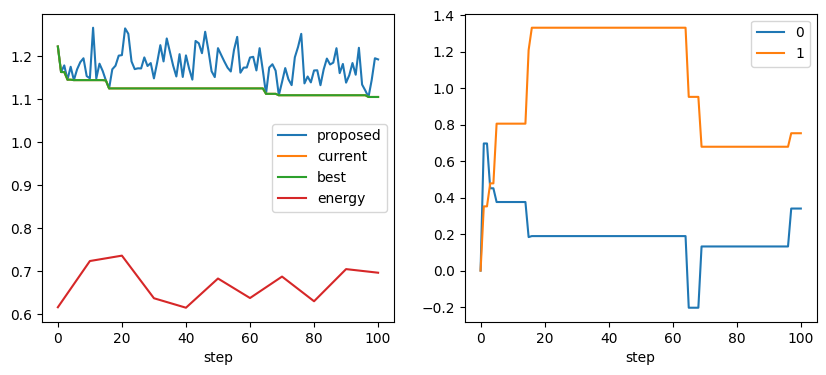

In [13]:
train_db_size = 30
test_db_size = 10
train_dataset = Dataset.generate_dataset(train_db_size, target_func)
test_dataset  = Dataset.generate_dataset(test_db_size,  target_func)


uman = UnitManager(nq, ng)
model = Model(
    nq, ny,
    EncodingUnitManager.AngleEncoding(nx, nq, repeat=True),
    [],
    # uman.generate_random_unit(),
    uman.generate_random_unit(),
)
optim = xoptim.LocalSearchOptimizer(train_dataset, test_dataset)
log = optim.optimize(model, 100, test_interval=10)


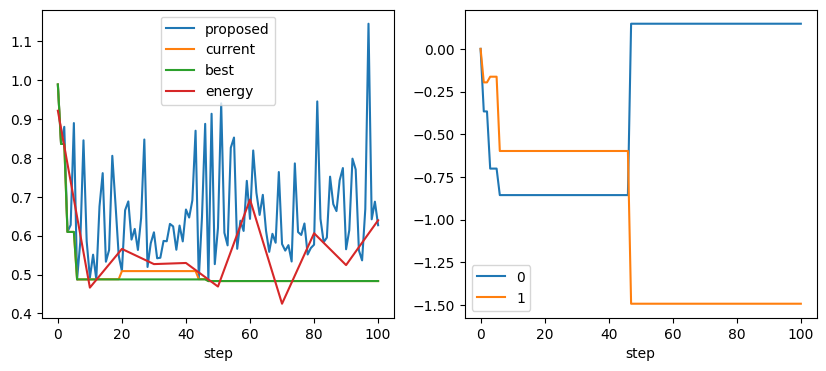

In [8]:
train_db_size = 30
test_db_size = 10
train_dataset = Dataset.generate_dataset(train_db_size, target_func)
test_dataset  = Dataset.generate_dataset(test_db_size,  target_func)


uman = UnitManager(nq, ng)
model = Model(
    nq, ny,
    EncodingUnitManager.AngleEncoding(nx, nq, repeat=True),
    [],
    # uman.generate_random_unit(),
    uman.generate_random_unit(),
)
optim = xoptim.MetropolisHastingsOptimizer(train_dataset, test_dataset, temperature=1/80)
log = optim.optimize(model, 100, test_interval=10)


In [10]:
params = log.first.x
params


array([[ 0.14729872, -1.49331278]])

In [13]:
wveval = xeval.WaveletEvaluator(xeval.Haar(), test_dataset, model)
wres = wveval(params)
wres.powers


array([ 0.06415825, -0.26013412,  0.6110017 , -0.29593751,  0.22398982,
        0.14995945,  0.34017817, -0.20830453, -0.00190978,  0.21021431,
       -0.1017494 ,  0.15420106,  0.00542196,  0.38076982, -0.28587702])